In [2]:
%%capture
%run final_chars_classification.ipynb



In [3]:
%run table_detector.ipynb

In [4]:
%run final_functions.ipynb

In [5]:
%run preprocessing.ipynb

In [6]:
%run get_rows_number.ipynb

./all_symbols/ 0
./all_symbols/( 70
./all_symbols/) 84
./all_symbols/+ 73
./all_symbols/A 76
./all_symbols/B 65
./all_symbols/C 79
./all_symbols/D 76
./all_symbols/E 71
./all_symbols/F 78
./all_symbols/implies 69
./all_symbols/xor 70
./all_symbols/~ 69


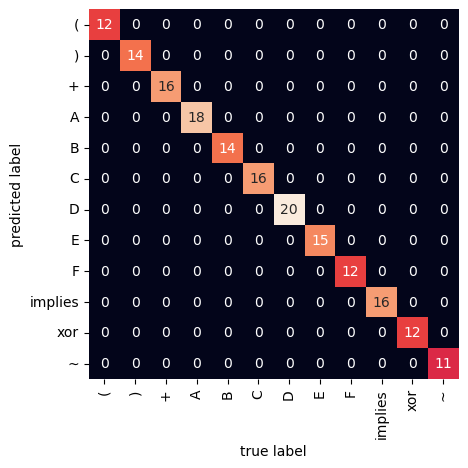

./0_1_symbols/ 0
./0_1_symbols/0 27
./0_1_symbols/1 27


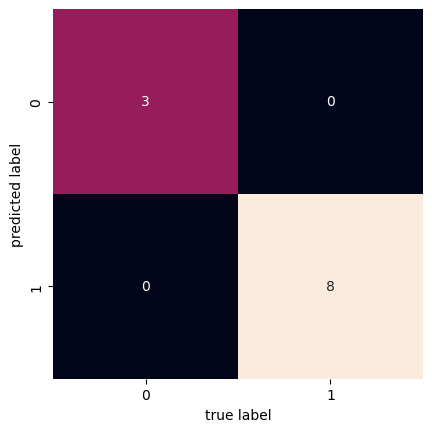

./letters_only_symbols/ 0
./letters_only_symbols/A 76
./letters_only_symbols/B 65
./letters_only_symbols/C 79
./letters_only_symbols/D 76
./letters_only_symbols/E 71
./letters_only_symbols/F 78


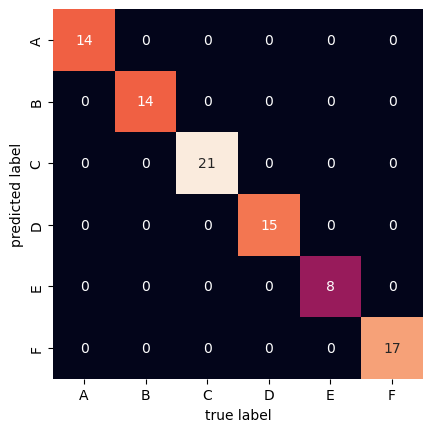

./E_F_symbols/ 0
./E_F_symbols/E 71
./E_F_symbols/F 78


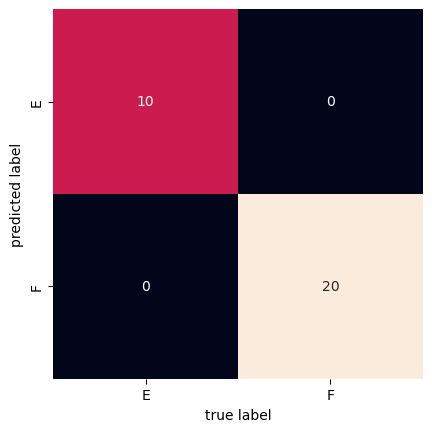

In [7]:
initialize_models(True)
load_models()

In [8]:
from tabular import tabular
import math

F0 =  c  +  b  +  a  +  

F1 =  a'b'c'  +  

F2 =  abc  +  



In [9]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, showTrace)#, table= True)

        letters = [classify(i, is_letter=True, is_table=is_table) for i in cells[0:col_num]]
        
        numbers = [classify(i, is_0_1=True, is_table=is_table) for i in cells[col_num:]]
        
        for i in  cells[col_num:]:
            show_images([i])
            print("out", classify(i, is_0_1=True, is_table=is_table))
        
        numbers = [int(i) for i in numbers]
        
        if True:
            print(letters)
            print(numbers)
            print('rows numbers ' + str(row_num))
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        num_outputs = col_num-int(math.log(row_num-1,2))
        print(f"num_outputs: {num_outputs}")
        solver.solve(cells=numbers, num_col=col_num, num_outputs=num_outputs)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img, showTrace= showTrace)
        
        if showTrace:
            print("ROWS")
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        result = []
        for ex in expressions:
            try:
                ex[1] ='='
                result.append(get_table(ex))
            except:
                result.append('error')
        
        for r in result:
            print(r)

In [10]:
image = cv2.imread("./test_images/final_test_4.jpg")

solve_expression(image, is_table=False, showTrace=True)




error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
# image = cv2.imread("./test_images/exs/t36.jpg") # TEST R
# image = cv2.imread("./test_images/exs/t35.jpg") # TEST R
# # image = cv2.imread("./test_images/exs/t40.jpg") # TEST R


# # image = cv2.imread("./test_images/exs/t34.jpg") # TEST R

# # image = cv2.imread("./test_images/exs/t33.jpg") 
# image = cv2.imread("./test_images/exs/t39.jpg") # TEST R
# # image = cv2.imread("./test_images/exs/t38.jpg") # TEST R

# result = solve_expression(image, is_table=True, showTrace=False)